In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#replacing blanks with 0 as tenure is of 0 months and no total charges recorded.

In [6]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype(float)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df["customerID"].duplicated().sum()

np.int64(0)

In [12]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen']=df["SeniorCitizen"].apply(conv)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


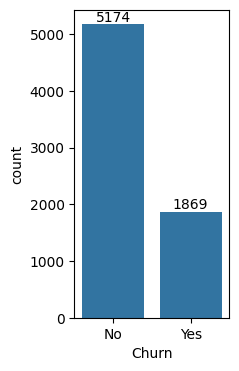

In [63]:
plt.figure(figsize=(2,4))
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.show()

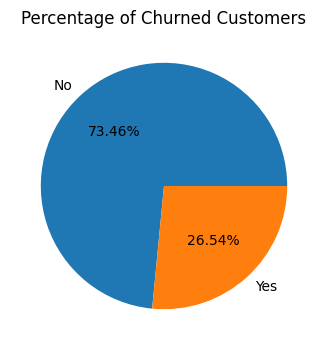

In [32]:
plt.figure(figsize=(4,4))
gb=df.groupby("Churn").agg({'Churn':"count"})

plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()


# From the given pie chart, we can conclude that 26.54% of our customers have churned out. Now, let's explore the reason behind it.

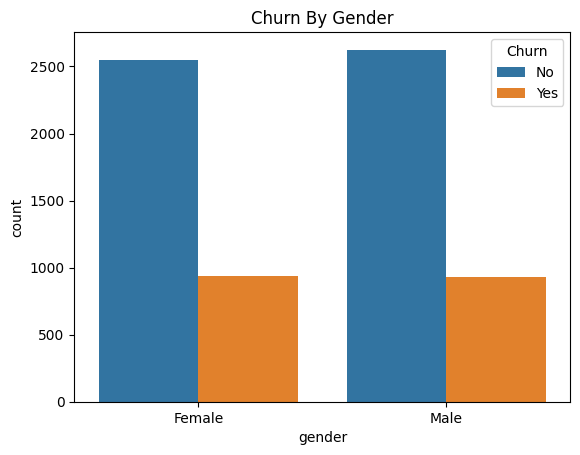

In [36]:
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Churn By Gender")
plt.show()

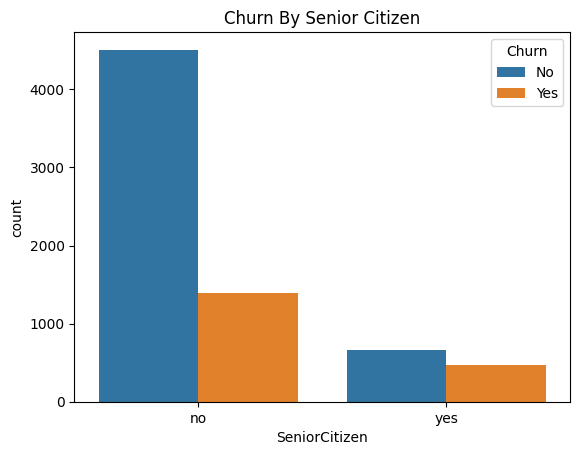

In [38]:
sns.countplot(x="SeniorCitizen",data=df,hue="Churn")
plt.title("Churn By Senior Citizen")
plt.show()

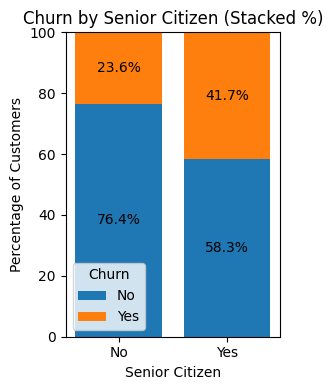

In [7]:
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
plt.figure(figsize=(3,4))


grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100


labels = grouped_percent.index
churn_no = grouped_percent['No']
churn_yes = grouped_percent['Yes']


plt.bar(labels, churn_no, label='No')
plt.bar(labels, churn_yes, bottom=churn_no, label='Yes')


for i in range(len(labels)):
    plt.text(i, churn_no.iloc[i]/2, f"{churn_no.iloc[i]:.1f}%", ha='center', va='center', color='black')
    plt.text(i, churn_no.iloc[i] + churn_yes.iloc[i]/2, f"{churn_yes.iloc[i]:.1f}%", ha='center', va='center', color='black')


plt.xlabel('Senior Citizen')
plt.ylabel('Percentage of Customers')
plt.title('Churn by Senior Citizen (Stacked %)')
plt.xticks([0, 1], ['No', 'Yes'])  
plt.ylim(0, 100)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

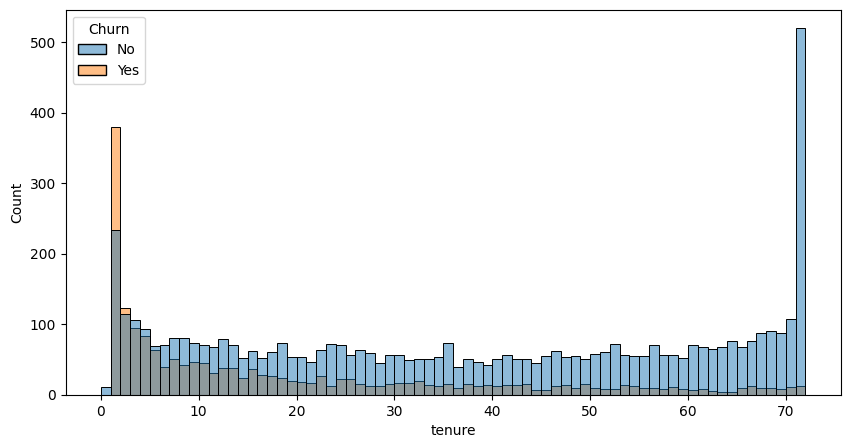

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(x="tenure",data=df, bins=72,hue="Churn")

plt.show()

#People who have used our services for long time has stayed and people who have used our services for less then few months have churned.

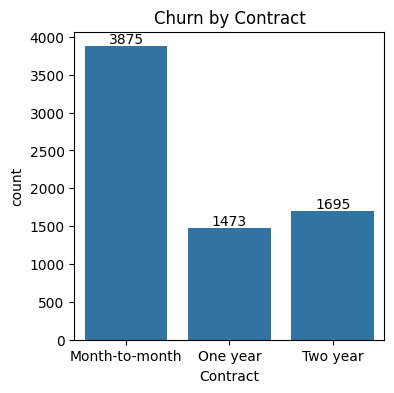

In [64]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df)
ax.bar_label(ax.containers[0])
plt.title("Churn by Contract")
plt.show()

#People with month to month contract are more likely to churn compare to those with yearly contract

In [55]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

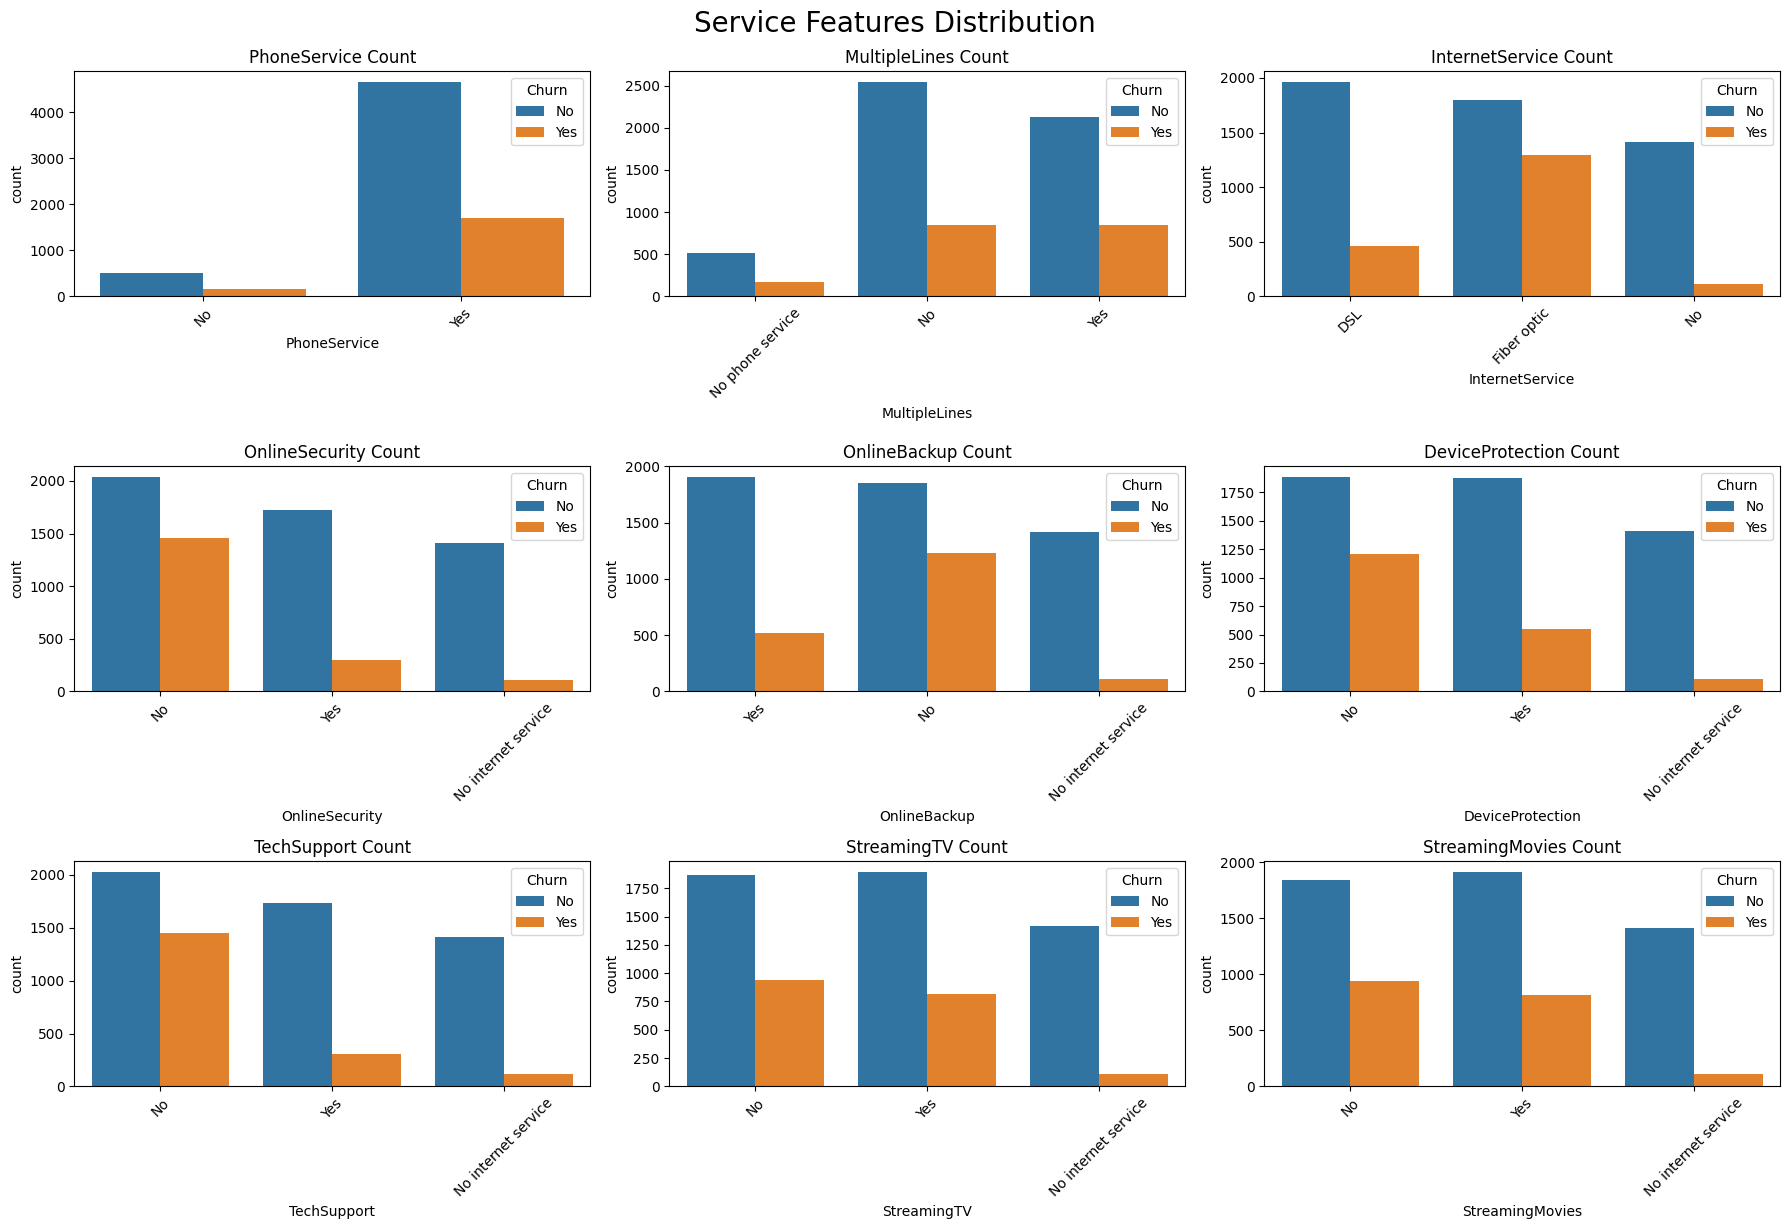

In [58]:
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i],hue=df["Churn"])
    axes[i].set_title(f'{col} Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Service Features Distribution", fontsize=20, y=1.02)
plt.show()

#Customers with Fiber optic internet and no support services like TechSupport or OnlineSecurity show significantly higher churn rates. Features like DeviceProtection, OnlineBackup, and TechSupport are linked to lower churn, indicating they improve customer retention. Surprisingly, users with streaming services tend to churn more, possibly due to added costs. Overall, value-added services reduce churn, while high-cost or under-supported plans increase it.

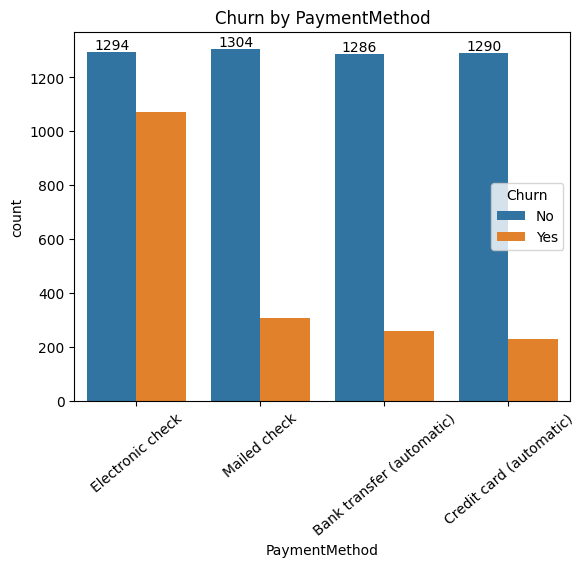

In [62]:
ax=sns.countplot(x="PaymentMethod",data=df,hue=df["Churn"])
ax.bar_label(ax.containers[0])
plt.title("Churn by PaymentMethod")
plt.xticks(rotation=40)
plt.show()